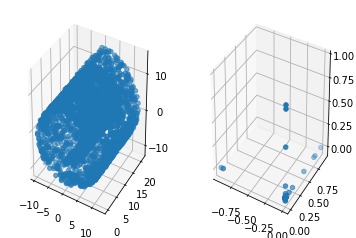

In [24]:
from sklearn.datasets.samples_generator import make_swiss_roll
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.decomposition import PCA, KernelPCA

# #############################################################################
# Generate data (swiss roll dataset)
n_samples = 3000
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=50)
X_kpca = kpca.fit_transform(X)

fig = plt.figure()
#ax = p3.Axes3D(fig)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2])
plt.show()

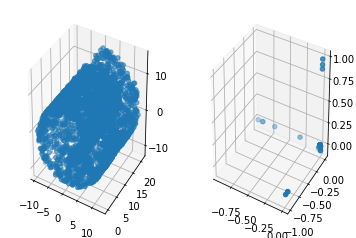

In [20]:
from sklearn.datasets.samples_generator import make_swiss_roll
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.decomposition import PCA, KernelPCA

# #############################################################################
# Generate data (swiss roll dataset)
n_samples = 3000
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=20)
X_kpca = kpca.fit_transform(X)

fig = plt.figure()
#ax = p3.Axes3D(fig)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2])
plt.show()

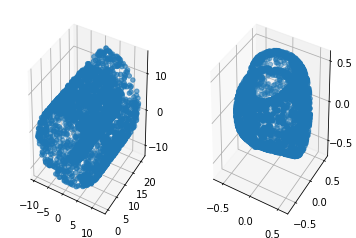

In [30]:
from sklearn.datasets.samples_generator import make_swiss_roll
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.decomposition import PCA, KernelPCA

# #############################################################################
# Generate data (swiss roll dataset)
n_samples = 3000
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=False, gamma=0.01)
X_kpca = kpca.fit_transform(X)

fig = plt.figure()
#ax = p3.Axes3D(fig)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2])
plt.show()

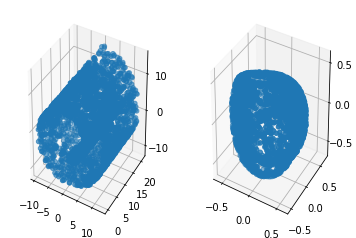

In [31]:
from sklearn.datasets.samples_generator import make_swiss_roll
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.decomposition import PCA, KernelPCA

# #############################################################################
# Generate data (swiss roll dataset)
n_samples = 3000
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=False, gamma=0.01)
X_kpca = kpca.fit_transform(X)

fig = plt.figure()
#ax = p3.Axes3D(fig)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2])
plt.show()

In [3]:
from sklearn.datasets.samples_generator import make_swiss_roll
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.animation as animation

# #############################################################################
# Generate data (swiss roll dataset)
n_samples = 3000
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)


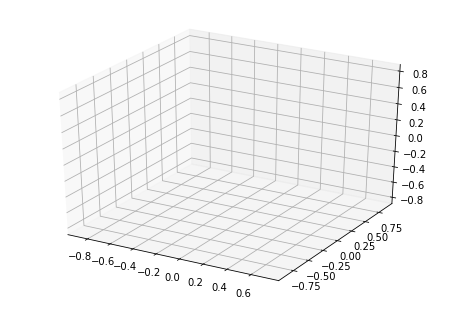

In [39]:
import numpy as np

fig = plt.figure()
ax = p3.Axes3D(fig)
#ax = fig.add_subplot(1, 2, 1, projection='3d')

#ax.scatter(X[:,0],X[:,1],X[:,2])

#ax = fig.add_subplot(1, 2, 2, projection='3d')
gamma = np.linspace(0.01,2.0,40)
ims = []
for i in gamma:
    #ax.clear()
    kpca = KernelPCA(kernel="rbf", fit_inverse_transform=False, gamma=i)
    X_kpca = kpca.fit_transform(X)
    im = ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2],color="g")
    ims.append([im])
#line = ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2])

ani = animation.ArtistAnimation(fig,ims,interval=500)


from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=2, metadata=dict(artist='Me'), bitrate=1800)
ani.save("kpca2.mp4", writer=writer)
#plt.show()

In [38]:
#ani = animation.ArtistAnimation(fig,ims,interval=3000)


from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=2, metadata=dict(artist='Me'), bitrate=1800)
ani.save("kpca.mp4", writer=writer)

In [30]:
ims[1]
plt.show()

In [40]:
ani.save("kpca.gif", writer="imagemagick")

In [25]:
gamma

array([0.01      , 0.23111111, 0.45222222, 0.67333333, 0.89444444,
       1.11555556, 1.33666667, 1.55777778, 1.77888889, 2.        ])

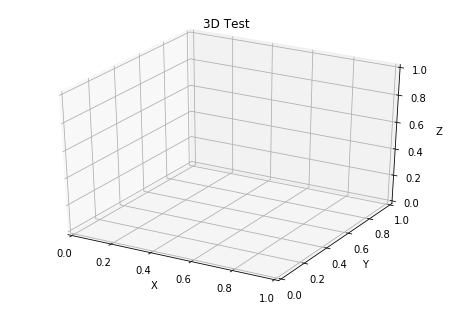

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
line_ani.save("movie2.mp4", writer=writer)
#plt.show()

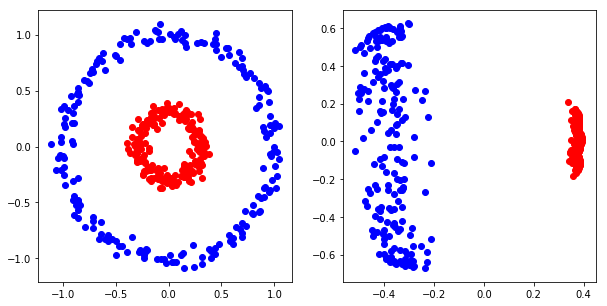

In [147]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
import numpy as np

X,y = make_circles(n_samples=400, factor=.3, noise=.05)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X[y==0,0], X[y==0,1],color="blue")
ax[0].scatter(X[y==1,0], X[y==1,1],color="red")

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=False, gamma=5)
X_kpca = kpca.fit_transform(X)
ax[1].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color="red")
ax[1].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color="blue")

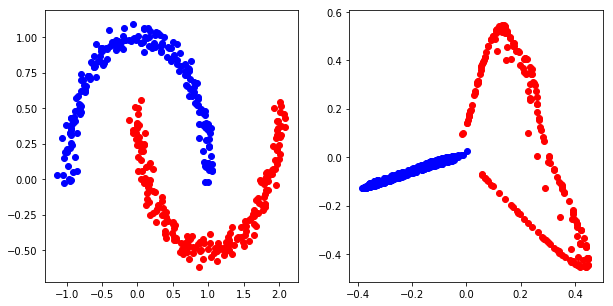

In [183]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
import numpy as np

X,y = make_moons(n_samples=400, noise=.05)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X[y==0,0], X[y==0,1],color="blue")
ax[0].scatter(X[y==1,0], X[y==1,1],color="red")

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=False, gamma=15)
X_kpca = kpca.fit_transform(X)
ax[1].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color="red")
ax[1].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color="blue")

In [182]:
X_kpca

array([[ 3.68863925e-01,  3.50597429e-03, -9.18518863e-02, ...,
         0.00000000e+00,  1.19439517e-10,  0.00000000e+00],
       [-2.69642074e-01, -4.65594655e-01,  5.76956512e-02, ...,
        -2.86426865e-11,  2.51107087e-10, -2.23898775e-10],
       [-3.50367786e-01, -5.02331222e-02,  6.55564343e-02, ...,
        -7.48620640e-10, -9.98201094e-10, -7.61201375e-10],
       ...,
       [-3.10262303e-01,  4.52883528e-01,  3.55305962e-02, ...,
        -2.17605895e-10, -1.82842065e-11, -2.69612547e-10],
       [ 4.17085075e-01,  9.96746098e-03,  5.47244079e-02, ...,
         4.44796033e-10, -7.26368549e-10,  1.79545047e-09],
       [-9.03479910e-02,  2.08927529e-01,  5.74888155e-04, ...,
        -4.67335089e-11,  2.08312653e-10, -2.45420151e-10]])